In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

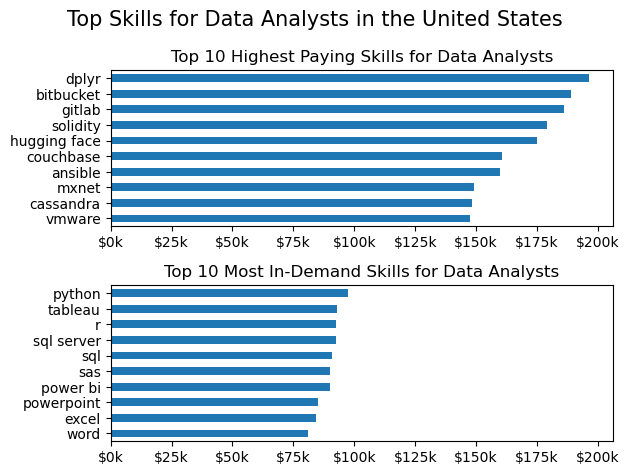

In [76]:
df_us = df[df['job_country']=='United States'].copy()
df_da_us= df_us[df_us['job_title_short']=='Data Analyst']
df_da_us = df_da_us.dropna(subset='salary_year_avg')
df_da_us_exploded = df_da_us.explode('job_skills').copy()
df_da_med_count = (df_da_us_exploded.groupby('job_skills')['salary_year_avg']
                 .agg(['median','count'])
)
df_da_top_pay = df_da_med_count.sort_values(by='median',ascending=False).head(10)
df_da_top_skill = df_da_med_count.sort_values(by='count',ascending=False).head(10)
df_da_top_skill = df_da_top_skill.sort_values(by='median',ascending=False)
fig, ax = plt.subplots(2,1)
df_da_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)
df_da_top_skill.plot(kind='barh',y='median',ax=ax[1],legend=False)

ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts')
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[0].invert_yaxis()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
fig.suptitle('Top Skills for Data Analysts in the United States', fontsize=15)
plt.tight_layout()
plt.show()